<a href="https://colab.research.google.com/github/hughjafro/DS-Unit-2-Sprint-3-Advanced-Regression/blob/master/CTolbert_DS_Unit_2_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 2 Sprint Challenge 3

## Logistic Regression and Beyond

In this sprint challenge you will fit a logistic regression modeling the probability of an adult having an income above 50K. The dataset is available at UCI:

https://archive.ics.uci.edu/ml/datasets/adult

Your goal is to:

1. Load, validate, and clean/prepare the data.
2. Fit a logistic regression model
3. Answer questions based on the results (as well as a few extra questions about the other modules)

Don't let the perfect be the enemy of the good! Manage your time, and make sure to get to all parts. If you get stuck wrestling with the data, simplify it (if necessary, drop features or rows) so you're able to move on. If you have time at the end, you can go back and try to fix/improve.

### Hints

It has a variety of features - some are continuous, but many are categorical. You may find [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) (a method to one-hot encode) helpful!

The features have dramatically different ranges. You may find [sklearn.preprocessing.minmax_scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale) helpful!

## Part 1 - Load, validate, and prepare data

The data is available at: https://archive.ics.uci.edu/ml/datasets/adult

Load it, name the columns, and make sure that you've loaded the data successfully. Note that missing values for categorical variables can essentially be considered another category ("unknown"), and may not need to be dropped.

You should also prepare the data for logistic regression - one-hot encode categorical features as appropriate.

In [0]:
# Import all packages

import numpy as np
np.set_printoptions(threshold=np.inf)
np.set_printoptions(suppress=True)

import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns

# Encoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

# For scaling
from sklearn.preprocessing import scale, StandardScaler

# Linear Regression models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Logistic Regression
from sklearn.linear_model import LogisticRegression


# For ridge regression
from sklearn.linear_model import Ridge

In [0]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation',
              'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hrsperweek', 'country', 'income']


In [108]:
df_raw = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df_raw.columns =['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation',
             'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hrsperweek', 'country', 'income']

print('Shape; ', df_raw.shape)
df_raw.head()

Shape;  (32561, 15)


,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hrsperweek,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


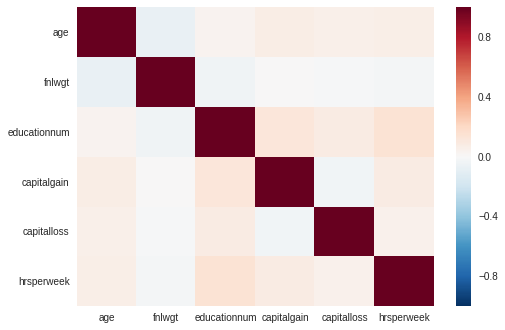

In [109]:
sns.heatmap(df_raw.corr())
plt.show()

In [110]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False)
    Convert categorical variable into dummy/indicator variables
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
    prefix : string, list of strings, or dict of strings, default None
        String to append DataFrame column names
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : string, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix.`
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Column names in the DataFrame to be encoded.
        If `columns` 

In [0]:
# categorical = preprocessing.OneHotEncoder()
# X = df_raw[['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation',
#               'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hrsperweek', 'country']]
# y = df_raw['income']

# X = categorical.fit_transform(X)

In [112]:
# Using get_dummies to address categoricals
df = pd.get_dummies(df_raw)

print(df.shape)
df.head()

(32561, 110)


,age,fnlwgt,educationnum,capitalgain,capitalloss,hrsperweek,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,maritalstatus_ Divorced,maritalstatus_ Married-AF-spouse,maritalstatus_ Married-civ-spouse,maritalstatus_ Married-spouse-absent,maritalstatus_ Never-married,maritalstatus_ Separated,maritalstatus_ Widowed,occupation_ ?,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,country_ ?,country_ Cambodia,country_ Canada,country_ China,country_ Columbia,country_ Cuba,country_ Dominican-Republic,country_ Ecuador,country_ El-Salvador,country_ England,country_ France,country_ Germany,country_ Greece,country_ Guatemala,country_ Haiti,country_ Holand-Netherlands,country_ Honduras,country_ Hong,country_ Hungary,country_ India,country_ Iran,country_ Ireland,country_ Italy,country_ Jamaica,country_ Japan,country_ Laos,country_ Mexico,country_ Nicaragua,country_ Outlying-US(Guam-USVI-etc),country_ Peru,country_ Philippines,country_ Poland,country_ Portugal,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [113]:
# Explore data types of df
df.dtypes

age                                     int64
fnlwgt                                  int64
educationnum                            int64
capitalgain                             int64
capitalloss                             int64
hrsperweek                              int64
workclass_ ?                            uint8
workclass_ Federal-gov                  uint8
workclass_ Local-gov                    uint8
workclass_ Never-worked                 uint8
workclass_ Private                      uint8
workclass_ Self-emp-inc                 uint8
workclass_ Self-emp-not-inc             uint8
workclass_ State-gov                    uint8
workclass_ Without-pay                  uint8
education_ 10th                         uint8
education_ 11th                         uint8
education_ 12th                         uint8
education_ 1st-4th                      uint8
education_ 5th-6th                      uint8
education_ 7th-8th                      uint8
education_ 9th                    

In [114]:
df.replace(' ?', np.nan, inplace=True)

df.isnull().sum().sum()

0

In [115]:
print(df['income_ <=50K'].value_counts())
print('\nHours per week\n', df['hrsperweek'].unique())


1    24720
0     7841
Name: income_ <=50K, dtype: int64

Hours per week
 [40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95]


In [116]:
# Checking country columns
filter_df = [col for col in df if col.startswith('country_')]
filter_df

['country_ ?',
 'country_ Cambodia',
 'country_ Canada',
 'country_ China',
 'country_ Columbia',
 'country_ Cuba',
 'country_ Dominican-Republic',
 'country_ Ecuador',
 'country_ El-Salvador',
 'country_ England',
 'country_ France',
 'country_ Germany',
 'country_ Greece',
 'country_ Guatemala',
 'country_ Haiti',
 'country_ Holand-Netherlands',
 'country_ Honduras',
 'country_ Hong',
 'country_ Hungary',
 'country_ India',
 'country_ Iran',
 'country_ Ireland',
 'country_ Italy',
 'country_ Jamaica',
 'country_ Japan',
 'country_ Laos',
 'country_ Mexico',
 'country_ Nicaragua',
 'country_ Outlying-US(Guam-USVI-etc)',
 'country_ Peru',
 'country_ Philippines',
 'country_ Poland',
 'country_ Portugal',
 'country_ Puerto-Rico',
 'country_ Scotland',
 'country_ South',
 'country_ Taiwan',
 'country_ Thailand',
 'country_ Trinadad&Tobago',
 'country_ United-States',
 'country_ Vietnam',
 'country_ Yugoslavia']

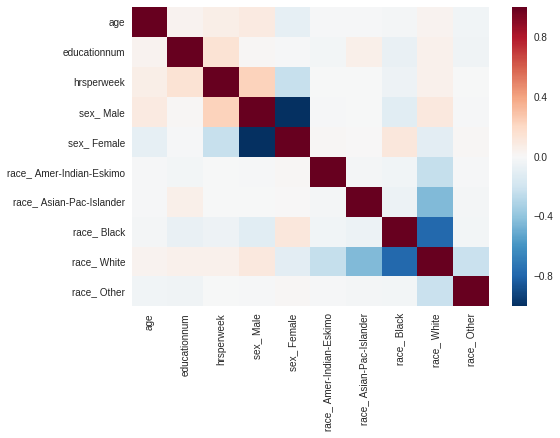

In [117]:
# Correlation plot
sns.heatmap(df[['age', 'educationnum', 'hrsperweek', 'sex_ Male', 'sex_ Female',
        'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
         'race_ White', 'race_ Other']].corr())
plt.show()

race_ Amer-Indian-Eskimo                int64
race_ Asian-Pac-Islander                int64
race_ Black                             int64
race_ Other 

## Part 2 - Fit and present a Logistic Regression

Your data should now be in a state to fit a logistic regression. Use scikit-learn, define your `X` (independent variable) and `y`, and fit a model.

Then, present results - display coefficients in as interpretible a way as you can (hint - scaling the numeric features will help, as it will at least make coefficients more comparable to each other). If you find it helpful for interpretation, you can also generate predictions for cases (like our 5 year old rich kid on the Titanic) or make visualizations - but the goal is your exploration to be able to answer the question, not any particular plot (i.e. don't worry about polishing it).

It is *optional* to use `train_test_split` or validate your model more generally - that is not the core focus for this week. So, it is suggested you focus on fitting a model first, and if you have time at the end you can do further validation.

In [129]:
# Choose independent and dependent variables
# X = df.loc[:,'age':'country_ Yugoslavia'] - start with smaller set
X = df[['age', 'educationnum', 'hrsperweek', 'sex_ Male', 'sex_ Female',
        'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
         'race_ White', 'race_ Other']]
y = df['income_ >50K']

# Linear Regression
lin_reg2 = LinearRegression().fit(X,y)
print('Linear Regression score: ',lin_reg2.score(X,y))

Linear Regression score:  0.21697390317565102


In [132]:
print('\nLinear Regression Coefficients: ', lin_reg2.coef_)
#print('\nLinear regression predict:\n', lin_reg2.predict(X))



Linear Regression Coefficients:  [ 0.00621752  0.05036143  0.00458461  0.07248671 -0.07248671 -0.03593331
  0.01980349 -0.01614283  0.03941198 -0.00713933]


In [119]:
# Try a test case:
# 1 - 30 yr old American Indian female, with a high school diploma and works 50hrs/wk
# 2 - 45 yr old White male with college degree and works 50 hrs
lin_reg2 = LinearRegression().fit(X,y)
lin_reg2.predict(df[['age', 'educationnum', 'hrsperweek', 'sex_ Male', 'sex_ Female',
        'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
         'race_ White', 'race_ Other']])

test_case1 = np.array([[30, 12, 50, 0,1,1,0,0,0,0]])
test_case2 = np.array([[45, 16, 50, 1,0,0,0,0,1,0]])

print('Test Case 1: ', lin_reg2.predict(test_case),'\n')
print('Test Case 2: ', lin_reg2.predict(test_case2))

Test Case 1:  [0.30762719] 

Test Case 2:  [0.67768109]


Test Case Results

1.   30.7% chance that a 30 yr old American Indian female, with a high school diploma and works 50hrs/wk will have an income greater than $50K.


2.   67.7% chance that a 45 yrs old White male, with a college degree and works 50hrs/wk will have an income greater than $50k

###Logistic Regression

In [124]:
# Keep same indep and dep variables
X = df[['age', 'educationnum', 'hrsperweek', 'sex_ Male', 'sex_ Female',
        'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
         'race_ White', 'race_ Other']]
y = df['income_ >50K']

log_reg = LogisticRegression(solver='lbfgs', max_iter=1000, verbose=1).fit(X,y)
log_reg.score(X,y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished


0.8032308590031019

In [121]:
# Check Logistic Regression predictor for 2 test cases
print('LogReg Test Case 1 Predictor: ', log_reg.predict(test_case)) #no
print('\nLogReg Test Case 2 Predictor: ', log_reg.predict(test_case2)) #yes


LogReg Test Case 1 Predictor:  [0]

LogReg Test Case 2 Predictor:  [1]


In [127]:
# Predict the probability of each feature
log_reg.predict_proba(X)[0]

array([0.52954511, 0.47045489])

In [123]:
# Predict the probability of each Test Case
print('Logistic Probability for Test case 1: ', log_reg.predict_proba(test_case))
print('Logistic Probability for Test case 2: ', log_reg.predict_proba(test_case2))

Logistic Probability for Test case 1:  [[0.75434857 0.24565143]]
Logistic Probability for Test case 2:  [[0.17384826 0.82615174]]


In [84]:
# The math
log_reg.coef_

array([[ 0.04506297,  0.35154064,  0.03519142,  0.59143146, -0.54469749,
        -0.1991344 ,  0.22528591, -0.007276  ,  0.3992951 , -0.37143664]])

In [83]:
log_reg.intercept_

array([-8.8441856])

In [0]:
# The sigmoid squishification function
def sigmoid(x):
  return 1 / (1 + np.e**(-x))

In [90]:
# Sigmoid for test case 1 - Same as predict_proba(test_case)
sigmoid(log_reg.intercept_ + np.dot(log_reg.coef_, np.transpose(test_case)))

array([[0.24565143]])

In [89]:
# Sigmoid for test case 2 - Same as predict_proba(test_case2)
sigmoid(log_reg.intercept_ + np.dot(log_reg.coef_, np.transpose(test_case2)))

array([[0.82615174]])

In [0]:
['age', 'educationnum', 'hrsperweek', 'sex_ Male', 'sex_ Female',
        'race_ Amer-Indian-Eskimo', 'race_ Asian-Pac-Islander', 'race_ Black',
         'race_ White', 'race_ Other']

In [0]:
[ 0.04506297,  0.35154064,  0.03519142,  0.59143146, -0.54469749,
        -0.1991344 ,  0.22528591, -0.007276  ,  0.3992951 , -0.37143664]

## Part 3 - Analysis, Interpretation, and Questions

### Based on your above model, answer the following questions

1. What are 3 features positively correlated with income above 50k?

**Three features that positively correlate with income above 50K are male (0.59143146), years of education (0.35154064) and white(0.3992951). **

2. What are 3 features negatively correlated with income above 50k?

**Three features that negatively correlate with income above 50k are female( -0.54469749), American Indian ( -0.1991344) and race classified as other (-0.37143664).**


3. Overall, how well does the model explain the data and what insights do you derive from it?

**The mean accuracy of the given test data and labels is .8032308 which is pretty decent in explaining those with income over 50k and those with income under 50k. Using 2 different test cases with the negatively and positively correlated features, shows a good level of accuracy. In a test case of a 30 yr old American Indian female, with a high school diploma and works 50hrs/wk, they have a 24.5% probability to have an income greater than 50K. While a 45 yrs old White male, with a college degree and works 50hrs/wk will have an 82.6% probability to have an income greater than $50k **


*These answers count* - that is, make sure to spend some time on them, connecting to your analysis above. There is no single right answer, but as long as you support your reasoning with evidence you are on the right track.

Note - scikit-learn logistic regression does *not* automatically perform a hypothesis test on coefficients. That is OK - if you scale the data they are more comparable in weight.

### Match the following situation descriptions with the model most appropriate to addressing them

In addition to logistic regression, a number of other approaches were covered this week. Pair them with the situations they are most appropriate for, and briefly explain why.

Situations:
1. You are given data on academic performance of primary school students, and asked to fit a model to help predict "at-risk" students who are likely to receive the bottom tier of grades.

**The most appropriate model to help predict at-risk students to have the bottom TIER of grades is quantile regression. QR will allow you to select a specific quantile or segment and test the features that impact those specific students**

2. You are studying tech companies and their patterns in releasing new products, and would like to be able to model and predict when a new product is likely to be launched.

**To model and predict when a new product is likely to be launched, it would be better to use Survival Analysis. SA allows us to evaluate the life cycle pattern of a new product and test against delayed products vs released products.**


3. You are working on modeling expected plant size and yield with a laboratory that is able to capture fantastically detailed physical data about plants, but only of a few dozen plants at a time.

**Modeling expected palnt size and yield with only a few dozen plants at a time is best suited for Ridge Regression due to it's use of regularization. It works well when there are large variances (steep slopes) in the data. RR creates a penalty function that will  reduce variances (MSE) which prevents overfitting.**

Approaches:
1. Ridge Regression
2. Quantile Regression
3. Survival Analysis